In [16]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 
import seaborn as sns 
sns.set_style('ticks');
current_colors = sns.color_palette()
from scipy.optimize import minimize
from scipy.optimize import brentq

In [17]:
def find_mut_pos(mutation):
    mut_list = mutation.split(':')
    return np.array(map(lambda x: 20-int(x[:-1]), mut_list))

def extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color, show_plot=True):
    data = Boyle_data.copy()
    data= data[data['seq'].apply(lambda x: x[-2:]=='GG')]
    data = data[data['nmut']>0]
    data.drop(['p5', 'p95', 'seq', 'series', 'count', 'se', 'nmut'], axis=1, inplace=True)
    data['MM_pos'] = data['mutations'].apply(find_mut_pos)
    data['MM_pos'] = data['MM_pos'].apply(lambda x: list(x[x>0]))
    data['nmut'] = data['MM_pos'].apply(len)        
    data = data[(data['nmut']>=nmut_min)&(data['nmut']<=nmut_max)]
    data['1st_MM_pos'] = data['MM_pos'].apply(lambda x: x[-1])
    data['MM_dist'] = data['MM_pos'].apply(lambda x: np.abs(np.diff(np.array(x))))
    if consecuitive:
        data = data[data['MM_dist'].apply(lambda x: np.all(x==1))]
    data.drop(['MM_pos','mutations','nmut','MM_dist'], axis=1, inplace=True)
    data.sort_values(by='1st_MM_pos',inplace=True)
    data.reset_index(inplace=True,drop=True)
    data = data[['1st_MM_pos', col_name]]
    data_med = data.groupby('1st_MM_pos').median()
    data_med.reset_index(inplace=True)
    
    if show_plot:
        plt.plot(data['1st_MM_pos'], data[col_name], 'o', color=color)
        plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
        plt.xlabel('1st mismatch position', fontsize=15)
        plt.ylabel(col_name, fontsize=15)
        plt.xticks(range(1,21),fontsize=15);
        plt.yticks(fontsize=15);
        title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
        if consecuitive:
            title = title + '   consecuitive'
        plt.title(title, fontsize=15)
    
    return data_med, data


## On rate

In [18]:
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data['slope'] = 1000*on_data['slope']
on_data['se'] = 1000*on_data['se']
on_data.rename(columns={'slope': 'Apparent on-rate ($10^{-3}$Hz)'}, inplace=True)

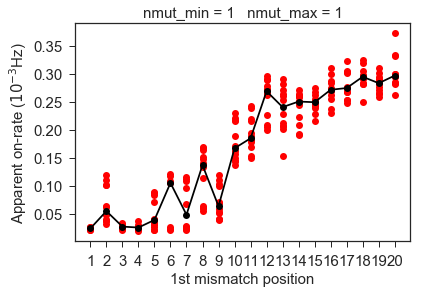

In [19]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 1
nmut_max = 1
consecuitive = False
color = 'r'
on_data_med_1MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

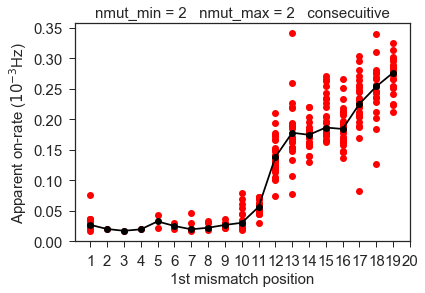

In [20]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = True
color = 'r'
on_data_med_2MM_consecuitive,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

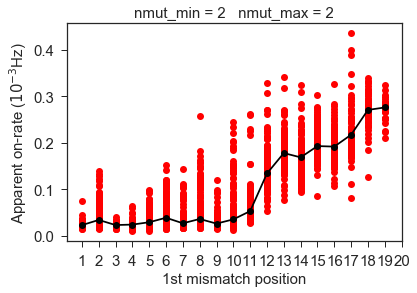

In [21]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = False
color = 'r'
on_data_med_2MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

(0, 0.4)

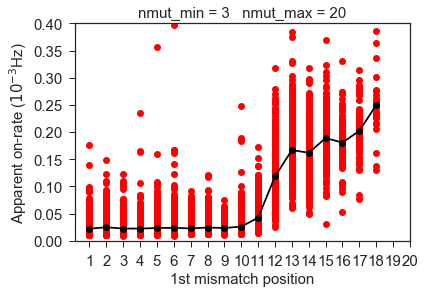

In [22]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 3
nmut_max = 20
consecuitive = False
color = 'r'
on_data_med_multiMM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)
plt.ylim([0,0.4])

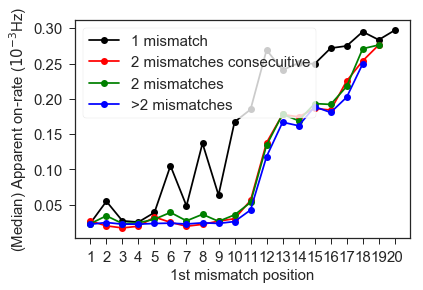

In [24]:
plt.plot(on_data_med_1MM['1st_MM_pos'], on_data_med_1MM[col_name], 'o-',color='k', label='1 mismatch')
plt.plot(on_data_med_2MM_consecuitive['1st_MM_pos'], on_data_med_2MM_consecuitive[col_name], 'o-',color='r', label='2 mismatches consecuitive')
plt.plot(on_data_med_2MM['1st_MM_pos'], on_data_med_2MM[col_name], 'o-',color='g', label='2 mismatches')
plt.plot(on_data_med_multiMM['1st_MM_pos'], on_data_med_multiMM[col_name], 'o-',color='b', label='>2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent on-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15,frameon=True)

plt.savefig('../reports/fig1_10_10_2018.pdf',format='pdf',bbox_inches='tight');

## Off rate

In [25]:
off_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.off.10nM.rep1.txt',delimiter='\t')
off_data['slope'] = -1000*off_data['slope']
off_data['se'] = 1000*off_data['se']
off_data.rename(columns={'slope': 'Apparent off-rate ($10^{-3}$Hz)'}, inplace=True)

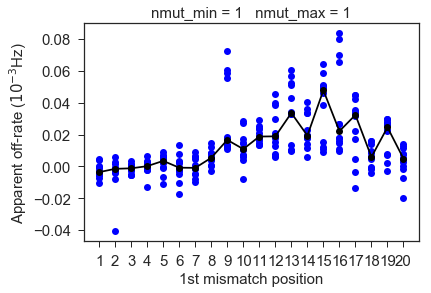

In [26]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 1
nmut_max = 1
consecuitive = False
color = 'b'
off_data_med_1MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

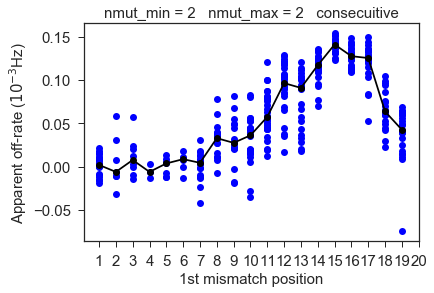

In [27]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = True
color = 'b'
off_data_med_2MM_consecuitive,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

(-0.05, 0.2)

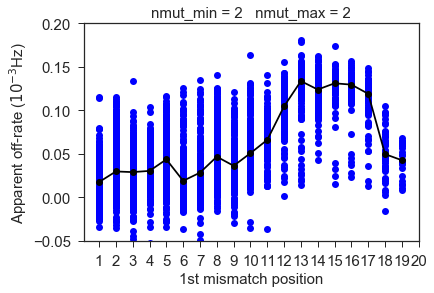

In [28]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = False
color = 'b'
off_data_med_2MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)
plt.ylim([-0.05,0.2])

(-0.05, 0.2)

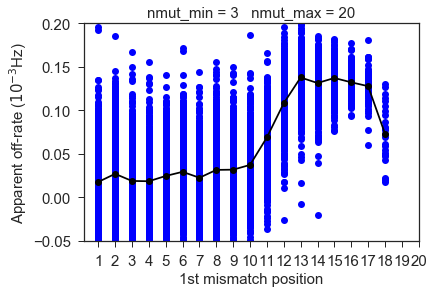

In [29]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 3
nmut_max = 20
consecuitive = False
color = 'b'
off_data_med_multiMM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)
plt.ylim([-0.05,0.2])

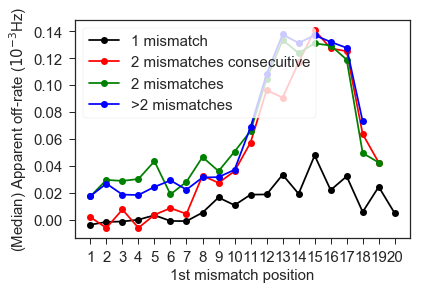

In [31]:
plt.plot(off_data_med_1MM['1st_MM_pos'], off_data_med_1MM[col_name], 'o-',color='k', label='1 mismatch')
plt.plot(off_data_med_2MM_consecuitive['1st_MM_pos'], off_data_med_2MM_consecuitive[col_name], 'o-',color='r', label='2 mismatches consecuitive')
plt.plot(off_data_med_2MM['1st_MM_pos'], off_data_med_2MM[col_name], 'o-',color='g', label='2 mismatches')
plt.plot(off_data_med_multiMM['1st_MM_pos'], off_data_med_multiMM[col_name], 'o-',color='b', label='>2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent off-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15,frameon=True)

plt.savefig('../reports/fig2_10_10_2018.pdf',format='pdf',bbox_inches='tight');

## Occupancy 

In [32]:
occ_data = pd.read_csv('../Data_Boyle/occupancy_rep1_processed_with_errors.txt',delimiter=',')
occ_data.rename(columns={'Ratio': 'Relative occupancy'}, inplace=True)
occ_data = occ_data[occ_data['nmut']>0]
occ_data['MM_pos'] = occ_data['mutations'].apply(find_mut_pos)
occ_data = occ_data[occ_data['MM_pos'].apply(lambda x: np.all(np.array(x)>=0))]
occ_data['MM_pos'] = occ_data['MM_pos'].apply(lambda x: filter(lambda y: y>0, x))
occ_data.drop(['Unnamed: 0', 'mutations', 'nmut', 'delta Intensity', 'se', 'rel_err', 'rel_err_Ratio'],
             inplace=True, axis=1)
occ_data['nmut'] = occ_data['MM_pos'].apply(lambda x: len(x))
occ_data = occ_data[occ_data['nmut']>0]
occ_data['1st_MM_pos'] = occ_data['MM_pos'].apply(lambda x: x[-1])
occ_data['MM_dist'] = occ_data['MM_pos'].apply(lambda x: np.abs(np.diff(np.array(x))))

occ_data_1MM = occ_data[occ_data['nmut']==1][['1st_MM_pos', 'Relative occupancy']].sort_values(by='1st_MM_pos',
                                                                                              inplace=False).reset_index(inplace=False, 
                                                                                                                        drop=True)
occ_data_2MM = occ_data[occ_data['nmut']==2][['1st_MM_pos', 'Relative occupancy']].sort_values(by='1st_MM_pos',
                                                                                              inplace=False).reset_index(inplace=False, 
                                                                                                                         drop=True)
occ_data_2MM_consecuitive = occ_data[(occ_data['nmut']==2)&(occ_data['MM_dist'].apply(lambda x: np.all(x==1)))][['1st_MM_pos', 'Relative occupancy']].sort_values(by='1st_MM_pos',
                                                                                              inplace=False).reset_index(inplace=False, 
                                                                                                                         drop=True)
occ_data_1MM_med = occ_data_1MM.groupby('1st_MM_pos').median().reset_index()
occ_data_2MM_med = occ_data_2MM.groupby('1st_MM_pos').median().reset_index()
occ_data_2MM_consecuitive_med = occ_data_2MM_consecuitive.groupby('1st_MM_pos').median().reset_index()

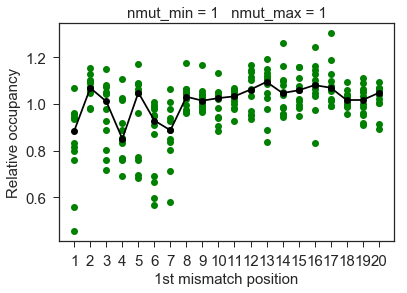

In [33]:
data=occ_data_1MM
data_med = occ_data_1MM_med
consecuitive = False
col_name = 'Relative occupancy'
nmut_min = 1
nmut_max = 1

plt.plot(data['1st_MM_pos'], data[col_name], 'o', color='g')
plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel(col_name, fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
if consecuitive:
    title = title + '   consecuitive'
plt.title(title, fontsize=15)

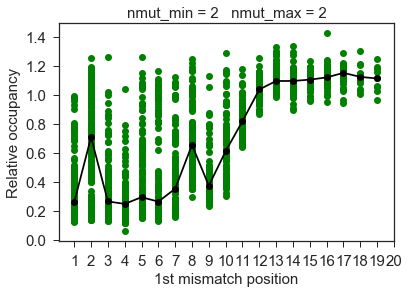

In [34]:
data=occ_data_2MM
data_med = occ_data_2MM_med
consecuitive = False
col_name = 'Relative occupancy'
nmut_min = 2
nmut_max = 2

plt.plot(data['1st_MM_pos'], data[col_name], 'o', color='g')
plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel(col_name, fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
if consecuitive:
    title = title + '   consecuitive'
plt.title(title, fontsize=15)

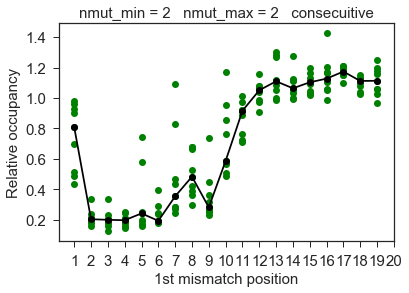

In [35]:
data=occ_data_2MM_consecuitive
data_med = occ_data_2MM_consecuitive_med
consecuitive = True
col_name = 'Relative occupancy'
nmut_min = 2
nmut_max = 2

plt.plot(data['1st_MM_pos'], data[col_name], 'o', color='g')
plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel(col_name, fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
if consecuitive:
    title = title + '   consecuitive'
plt.title(title, fontsize=15)

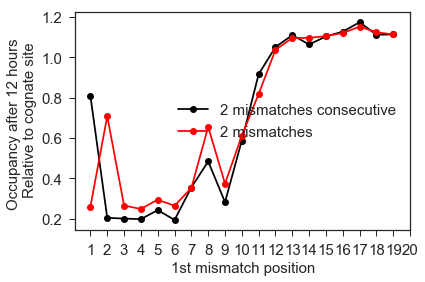

In [72]:
plt.plot(occ_data_2MM_consecuitive_med['1st_MM_pos'], occ_data_2MM_consecuitive_med['Relative occupancy'], 'o-',color='k', label='2 mismatches consecutive')
plt.plot(occ_data_2MM_med['1st_MM_pos'], occ_data_2MM_med['Relative occupancy'], 'o-',color='r', label='2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('Occupancy after 12 hours \n Relative to cognate site', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)
plt.savefig('../reports/fig3_10_10_2018.pdf',format='pdf',bbox_inches='tight');

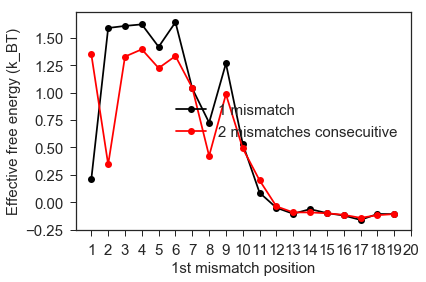

In [37]:
plt.plot(occ_data_2MM_consecuitive_med['1st_MM_pos'], -np.log(occ_data_2MM_consecuitive_med['Relative occupancy']), 'o-',color='k', label='1 mismatch')
plt.plot(occ_data_2MM_med['1st_MM_pos'], -np.log(occ_data_2MM_med['Relative occupancy']), 'o-',color='r', label='2 mismatches consecuitive')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('Effective free energy (k_BT)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)
plt.savefig('../reports/fig4_10_10_2018.pdf',format='pdf',bbox_inches='tight');

## Predicting measured dissociation rates from measured association rates 

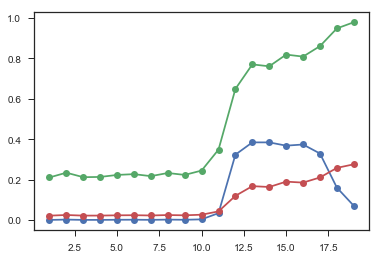

In [40]:
def P(kon,koff,t):
    return kon/(kon+koff) * (1 - np.exp(-(kon+koff)*t))

def least_squares_line_through_origin(x_points, y_points):
    return np.sum( x_points*y_points )/np.sum( x_points*x_points )

def least_squares(x_points, y_points):
    size = len(x_points)
    X = np.ones((size, 2))
    X[:, 1] = x_points

    XT = X.transpose()
    Y = y_points

    a = np.dot(np.dot(np.linalg.inv(np.dot(XT, X)), XT), Y)

    intercept = a[0]
    slope = a[1]
    return intercept, slope


def association(kon,koff):
    times = np.array([0.5,1.0,1.5])
    fluoresence = P(kon,koff,times)
    k_asso = least_squares_line_through_origin(x_points=times, y_points=fluoresence)
    return k_asso



def find_on_target(kon,k_asso):
    return k_asso - association(kon,koff=0.0)

 
def find_off_rate(koff,kon,k_asso):
    return k_asso - association(kon, koff)



def dissociation(koff):
    times = np.array([0.5,1.0,1.5])
    fluoresence = np.exp(-koff * times)
    _, k_disso = least_squares(x_points=times, y_points=fluoresence)
    return -1*k_disso


'''
load and prepare on-target
'''
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data['slope'] = 1000*on_data['slope']
on_data['se'] = 1000*on_data['se']
on_data.rename(columns={'slope': 'Apparent on-rate ($10^{-3}$Hz)'}, inplace=True)

on_target = on_data[on_data['nmut']==0]['Apparent on-rate ($10^{-3}$Hz)']
on_target = float(on_target)

kOT = brentq(find_on_target,a=0.01, b=1.0,args=(on_target))


'''
load off-targets
'''

Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 20
consecuitive = False
color = 'r'
on_data_more_than_one,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color,show_plot=False)
on_data_more_than_one = np.array(on_data_more_than_one['Apparent on-rate ($10^{-3}$Hz)'])






koff = []
for k_asso in on_data_more_than_one:
    predicted = brentq(find_off_rate,a=0.001,b=100.,args=(kOT, k_asso))
    koff.append(predicted)

    
k_disso = []
for offrate in koff:
    aparent_off_rate = dissociation(offrate)
    k_disso.append(aparent_off_rate)


plt.plot(range(1,20),k_disso, marker='o');



occupancy = []
for offrate in koff:
    prediction = P(10*kOT,offrate,12*3.6)
    occupancy.append(prediction)
    

plt.plot(range(1,20),occupancy,marker='o')

plt.plot(range(1,20),on_data_more_than_one,marker='o')

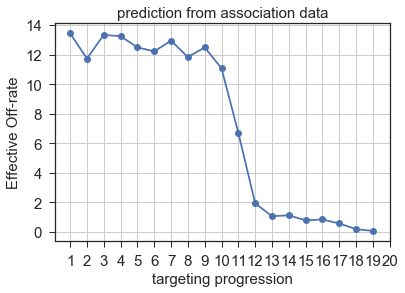

In [52]:
plt.plot(range(1,20),koff,marker='o');
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.grid('on')
plt.ylabel('Effective Off-rate',fontsize=15)
plt.xlabel('targeting progression',fontsize=15)
plt.title('prediction from association data',fontsize=15);
# plt.savefig('../reports/fig5_10_10_2018.pdf',format='pdf',bbox_inches='tight');

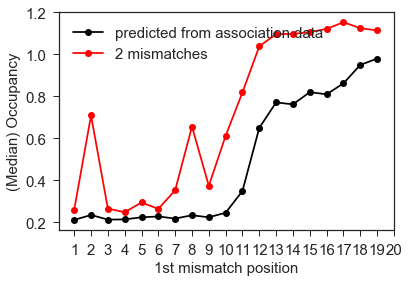

In [49]:
plt.plot(occ_data_2MM_med['1st_MM_pos'] ,occupancy, 'o-',color='k', label='predicted from association data')
plt.plot(occ_data_2MM_med['1st_MM_pos'], occ_data_2MM_med['Relative occupancy'], 'o-',color='r', label='2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Occupancy', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)
plt.savefig('../reports/fig6_10_10_2018.pdf',format='pdf',bbox_inches='tight');

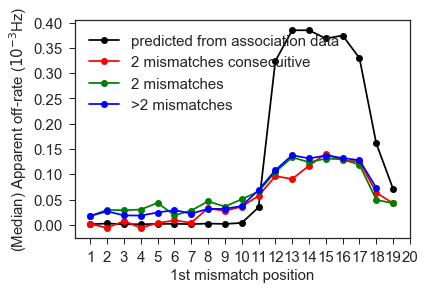

In [50]:


col_name = 'Apparent off-rate ($10^{-3}$Hz)'

plt.plot(range(1,20),k_disso, marker='o', label='predicted from association data', color='black');
plt.plot(off_data_med_2MM_consecuitive['1st_MM_pos'], off_data_med_2MM_consecuitive[col_name], 'o-',color='r', label='2 mismatches consecuitive')
plt.plot(off_data_med_2MM['1st_MM_pos'], off_data_med_2MM[col_name], 'o-',color='g', label='2 mismatches')
plt.plot(off_data_med_multiMM['1st_MM_pos'], off_data_med_multiMM[col_name], 'o-',color='b', label='>2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent off-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)
plt.savefig('../reports/fig7_10_10_2018.pdf',format='pdf',bbox_inches='tight');

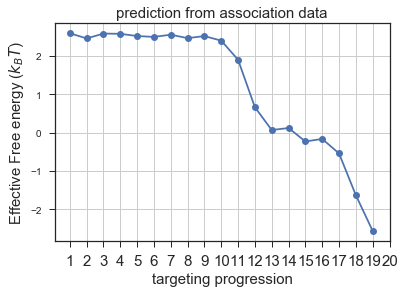

In [53]:
free_energy = np.log(koff)
plt.plot(range(1,20),free_energy,marker='o')
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')
plt.ylabel('Effective Free energy ($k_BT$)',fontsize=15)
plt.xlabel('targeting progression',fontsize=15)
plt.title('prediction from association data',fontsize=15);
plt.savefig('../reports/fig5_10_10_2018.pdf',format='pdf',bbox_inches='tight');

# predicting association data from dissociation data

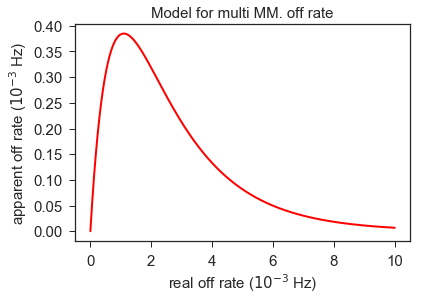

In [54]:
plt.figure(2)

koff = np.arange(0,10,0.001)
k_disso = []
for offrate in koff:
    k_disso.append( dissociation(offrate)  )



plt.plot(koff, k_disso, 
         color='r',lw=2)
plt.xlabel('real off rate ($10^{-3}$ Hz)', fontsize=15)
plt.ylabel('apparent off rate ($10^{-3}$ Hz)', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('Model for multi MM. off rate', fontsize=15);
plt.savefig('../reports/fig8_10_10_2018.pdf',format='pdf',bbox_inches='tight');


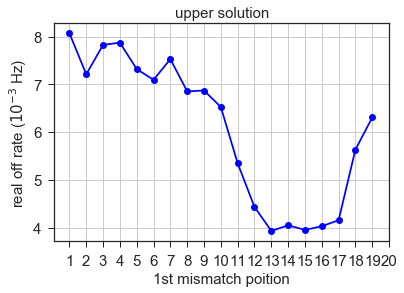

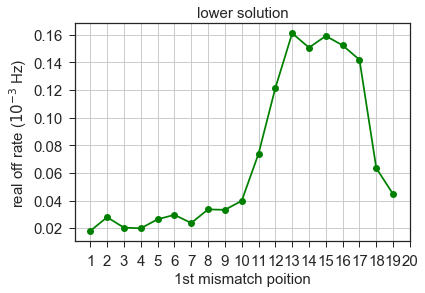

In [55]:

Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 20
consecuitive = False
color = 'r'
off_data_more_than_one,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color,show_plot=False)
off_data_more_than_one = np.array(off_data_more_than_one['Apparent off-rate ($10^{-3}$Hz)'])




k_opt = minimize(lambda x: -1*dissociation(x),x0=1).x[0]

real_offrate_usol =[]
real_offrate_lsol =[]

for k in off_data_more_than_one:
    koff_u = brentq(lambda x: dissociation(x)-k,a=k_opt, b=10000)
    koff_l = brentq(lambda x: k-dissociation(x),a=0, b=k_opt)
    real_offrate_usol.append(koff_u)
    real_offrate_lsol.append(koff_l)

    
plt.figure(3)
plt.plot(range(1,20), real_offrate_usol, marker='o', color='b')
plt.xlabel('1st mismatch poition', fontsize=15)
plt.ylabel('real off rate ($10^{-3}$ Hz)', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('upper solution', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')
plt.savefig('../reports/fig9_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure(4)
plt.plot(range(1,20), real_offrate_lsol, marker='o', color='g')
plt.xlabel('1st mismatch poition', fontsize=15)
plt.ylabel('real off rate ($10^{-3}$ Hz)', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('lower solution', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')


plt.savefig('../reports/fig10_10_10_2018.pdf',format='pdf',bbox_inches='tight');

In [56]:
real_offrate_usol = np.array(real_offrate_usol)
real_offrate_lsol = np.array(real_offrate_lsol)
cross_point = 13
real_offrate = np.copy(real_offrate_usol)
real_offrate[cross_point-20:] = real_offrate_lsol[cross_point-20:]

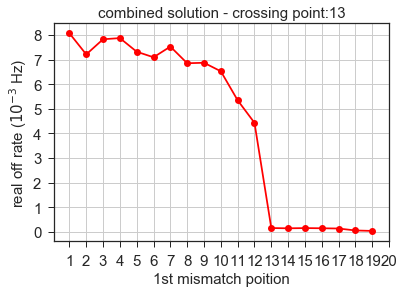

In [57]:
plt.figure(4)
plt.plot(range(1,20), real_offrate, marker='o', color='r')
plt.xlabel('1st mismatch poition', fontsize=15)
plt.ylabel('real off rate ($10^{-3}$ Hz)', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('combined solution - crossing point:' + str(cross_point), fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')
plt.savefig('../reports/fig11_10_10_2018.pdf',format='pdf',bbox_inches='tight');

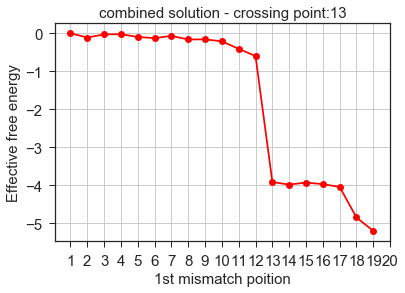

In [59]:
plt.figure(4)
plt.plot(range(1,20), np.log(real_offrate/real_offrate[0]), marker='o', color='r')
plt.xlabel('1st mismatch poition', fontsize=15)
plt.ylabel('Effective free energy', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('combined solution - crossing point:' + str(cross_point), fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')
plt.savefig('../reports/fig11_10_10_2018.pdf',format='pdf',bbox_inches='tight');

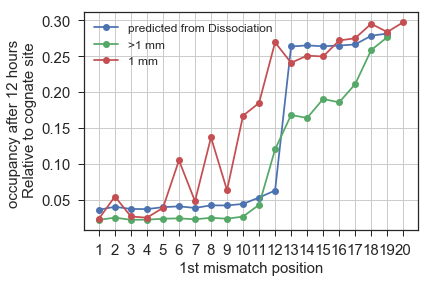

In [65]:
k_asso = []
for offrate in real_offrate:
    k_asso.append( association(kOT,offrate)  )


plt.figure()
plt.plot(range(1,20),k_asso,marker='o', label='predicted from Dissociation')
plt.plot(range(1,20),on_data_more_than_one,marker='o', label='>1 mm')
plt.plot(range(1,21),on_data_med_1MM['Apparent on-rate ($10^{-3}$Hz)'],marker='o',label='1 mm')
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')
plt.legend(fontsize=12);
plt.ylabel('occupancy after 12 hours \n Relative to cognate site', fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('1st mismatch position',fontsize=15);
plt.savefig('../reports/fig12_10_10_2018.pdf',format='pdf',bbox_inches='tight');

# predicting starting from occupancy 

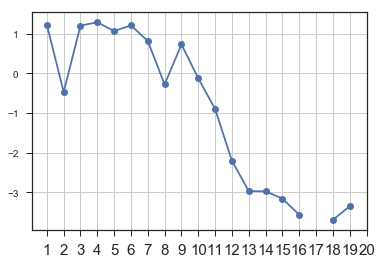

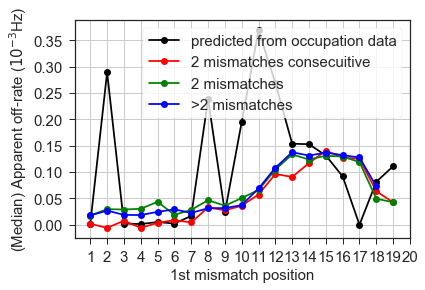

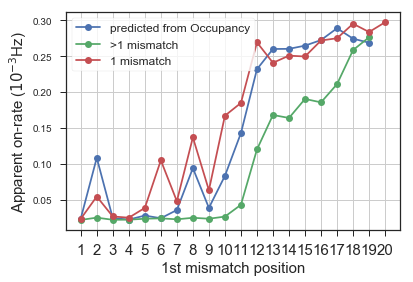

In [70]:
def calc_free_energy_from_experiment(occ_data):
    return np.log(occ_data**(-1)-1)  

def energy_to_off(energy,kOT):
    return kOT * np.exp(+energy)


occ_data_scaled = occ_data_2MM_med['Relative occupancy']/occ_data_2MM_med['Relative occupancy'].max() 
free_energy = np.array( occ_data_scaled.apply(calc_free_energy_from_experiment) )

koff = energy_to_off(free_energy, 10*kOT)

k_asso = []
for offrate in koff:
    k_asso.append(association(kOT,offrate))
k_asso = np.array(k_asso)


k_disso = []
for offrate in koff:
    k_disso.append( dissociation(offrate)  )

plt.figure()
plt.plot(range(1,20),free_energy,marker='o')
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')


plt.figure()
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
plt.plot(range(1,20),k_disso, marker='o', label='predicted from occupation data', color='black');
plt.plot(off_data_med_2MM_consecuitive['1st_MM_pos'], off_data_med_2MM_consecuitive[col_name], 'o-',color='r', label='2 mismatches consecuitive')
plt.plot(off_data_med_2MM['1st_MM_pos'], off_data_med_2MM[col_name], 'o-',color='g', label='2 mismatches')
plt.plot(off_data_med_multiMM['1st_MM_pos'], off_data_med_multiMM[col_name], 'o-',color='b', label='>2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent off-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15,frameon=True)
plt.xticks(range(1,21),fontsize=15);
plt.grid('on')
plt.savefig('../reports/fig12_10_10_2018.pdf',format='pdf',bbox_inches='tight');


plt.figure()
plt.plot(range(1,20),k_asso,marker='o', label='predicted from Occupancy')
plt.plot(range(1,20),on_data_more_than_one,marker='o',label='>1 mismatch')
plt.plot(range(1,21),on_data_med_1MM['Apparent on-rate ($10^{-3}$Hz)'],marker='o',label='1 mismatch')
plt.xticks(range(1,21),fontsize=15);
plt.legend(fontsize=12,frameon=True)
plt.grid('on')
plt.ylabel('Apparent on-rate ($10^{-3}$Hz)',fontsize=15)
plt.xlabel('1st mismatch position',fontsize=15)
plt.savefig('../reports/fig13_10_10_2018.pdf',format='pdf',bbox_inches='tight');